## Image Classification using Deep Neural Networks

**Objective:** To build and train an image classifier using Convoluted neural Networks, establish a baseline performance of classifier, improve learning and model capacity through data augmentation and use the model to make predictions.
### CIFAR10 Dataset
The model is trained on CIFAR10 dataset. The CIFAR-10 dataset consists of 60000x32 x 32 colour images divided in 10 classes, with 6000 images in each class. There are 50000 training images and 10000 test images.



In [0]:
%tensorflow_version 1.x
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Import CIFAR10 dataset from Keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [28]:
X_train.shape

(50000, 32, 32, 3)

In [29]:
y_train.shape

(50000, 1)

[3]


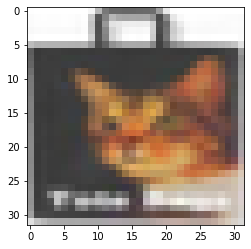

In [30]:
i = 3000
plt.imshow(X_train[i])
print(y_train[i])

Visualising random images on a 12X12 grid along with their labels




/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


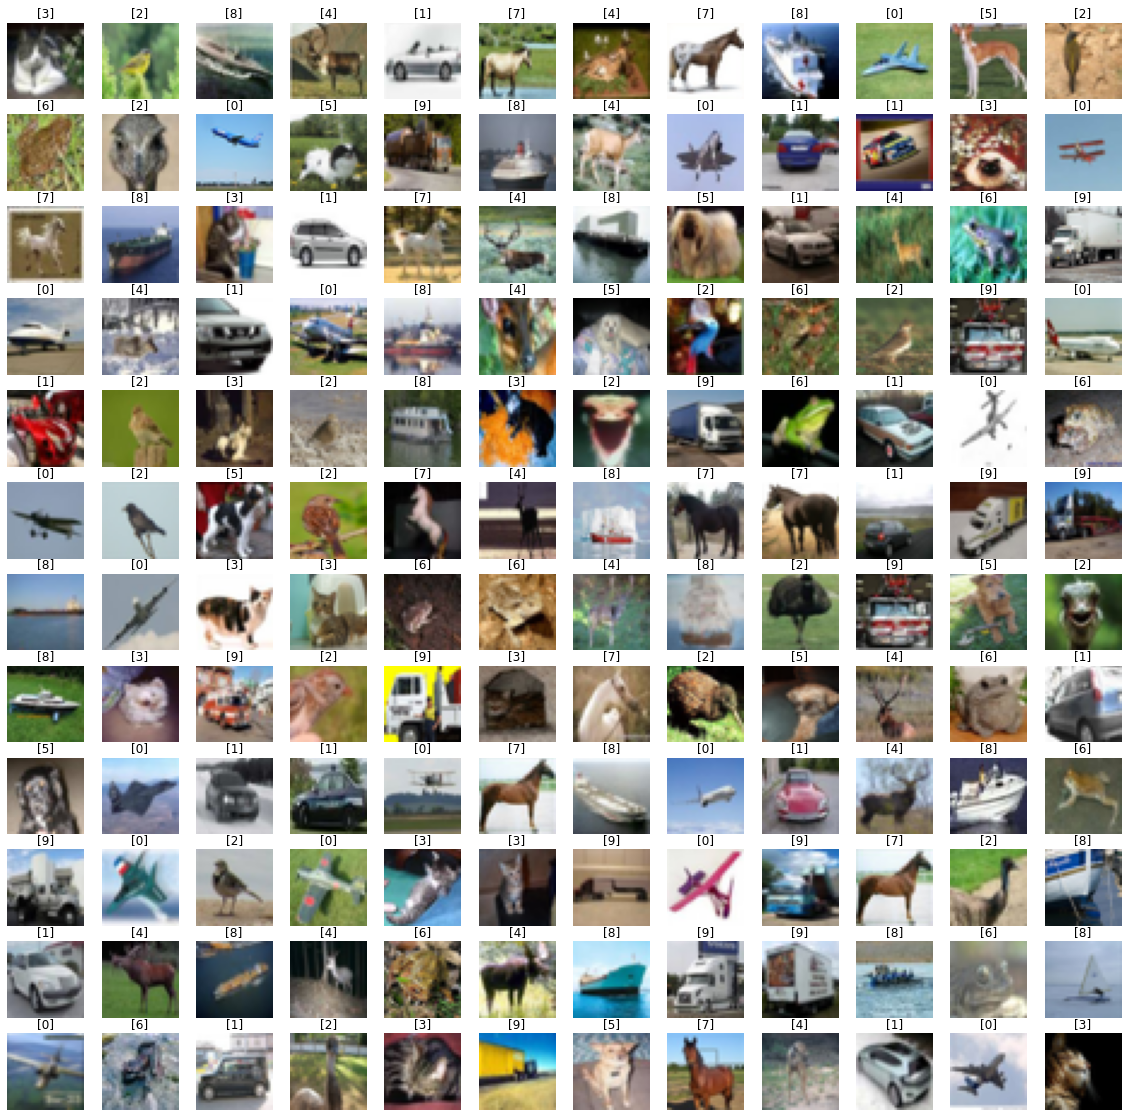

In [31]:
Lgrid = 12
Wgrid =12

fig,axes = plt.subplots(Lgrid,Wgrid,figsize = (20,20))
axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0,Lgrid*Wgrid):
  index = np.random.randint(n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')
#plt.subplots_adjust(hspace=0.25)
plt.savefig('Quick_look_at_data.png')

### Step 3: Data Preparation

In [0]:
# Convert images to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
#  convert class labels to one-hot encoded vectors using keras.utils.to_categorical
number_cat = 10 #number of categories
import keras
y_train = keras.utils.to_categorical(y_train,number_cat)
y_test = keras.utils.to_categorical(y_test,number_cat)

In [0]:
#Normalise the input
X_train = X_train/255
X_test = X_test/255

In [35]:
#Modify input shape
#input image is a tensor whose width is 32 pixels and height is 32 pixels with 3 channels representing RGB( red, green, blue) color intensities.
#Thus we need to define a model which takes (None, 32, 32, 3) input shape and predicts (None, 10) output with probabilities for all classes.
#None in shapes stands for batch
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

### Step 4: Training the model

In [0]:
#Build Convutional Neural Network
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))# Stack another convolutional layer with same number of filters and kernels
cnn_model.add(MaxPooling2D(2,2))#add 2x2 pooling layer
cnn_model.add(Dropout(0.2))#Dropout layer after every pooling layer is used to reduce overfitting in the model with setting the fraction value to .20 so that .20 fraction of units will be dropped
# Add density
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))# input shape is inherited, no need to add here
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())#Flatten layer before first dense layer to reshape input volume into a flat vector
cnn_model.add(Dense(units = 512, activation = 'relu', ))
cnn_model.add(Dense(units = 512, activation = 'relu', ))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [37]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)         

In [38]:
#Assign loss function, optimizer, and metrics to the model
cnn_model.compile(loss= 'categorical_crossentropy', optimizer=keras.optimizers.rmsprop(lr=0.001), metrics =['accuracy'])
history = cnn_model.fit(X_train,y_train, epochs = 20, batch_size = 150, shuffle = True)


Epoch 1/20
50000/50000 [==============================] - 5s 106us/step - loss: 1.7793 - acc: 0.3551
Epoch 2/20
50000/50000 [==============================] - 5s 100us/step - loss: 1.4014 - acc: 0.4975
Epoch 3/20
50000/50000 [==============================] - 5s 99us/step - loss: 1.2208 - acc: 0.5682
Epoch 4/20
50000/50000 [==============================] - 5s 101us/step - loss: 1.0878 - acc: 0.6157
Epoch 5/20
50000/50000 [==============================] - 5s 101us/step - loss: 0.9795 - acc: 0.6550
Epoch 6/20
50000/50000 [==============================] - 5s 102us/step - loss: 0.8963 - acc: 0.6836
Epoch 7/20
50000/50000 [==============================] - 5s 100us/step - loss: 0.8268 - acc: 0.7096
Epoch 8/20
50000/50000 [==============================] - 5s 103us/step - loss: 0.7591 - acc: 0.7304
Epoch 9/20
50000/50000 [==============================] - 5s 100us/step - loss: 0.7038 - acc: 0.7530
Epoch 10/20
50000/50000 [==============================] - 5s 101us/step - loss: 0.6545 - ac

## Model Evaluation

In [14]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 90us/step
Test Accuracy: 0.7387


In [0]:
y_predict = cnn_model.predict_classes(X_test)
y_test = y_test.argmax(1)

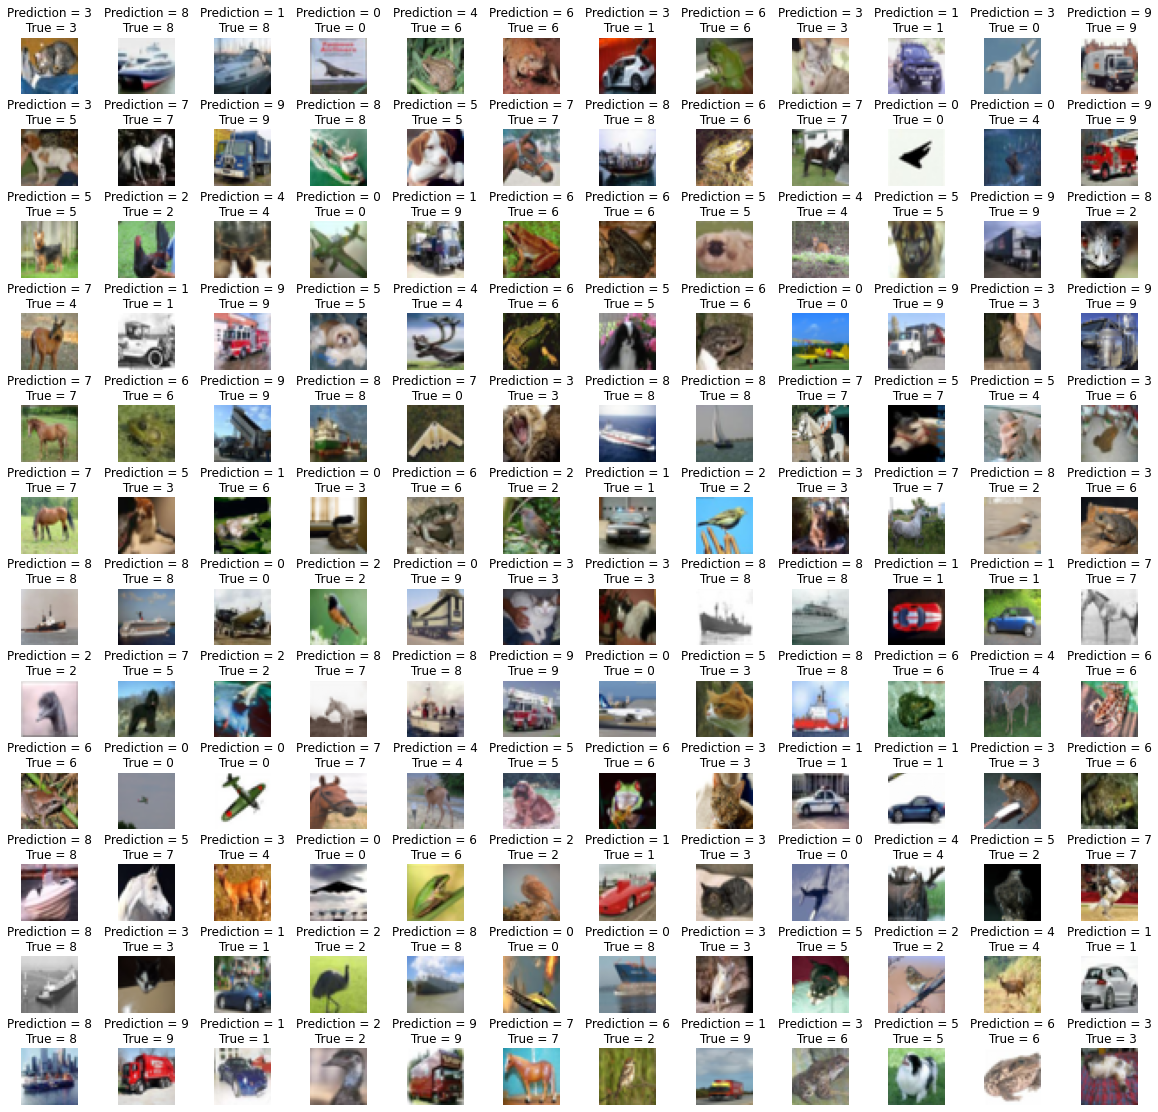

In [16]:
#Compare predicted class against true classes through visualisation

L =12
W =12

fig,axes = plt.subplots(L,W,figsize=(20,20))
axes = axes.ravel()

for i in np.arange(0,L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\n True = {}'.format(y_predict[i],y_test[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace =0.7)
plt.savefig('PredictedVsTrue.png')

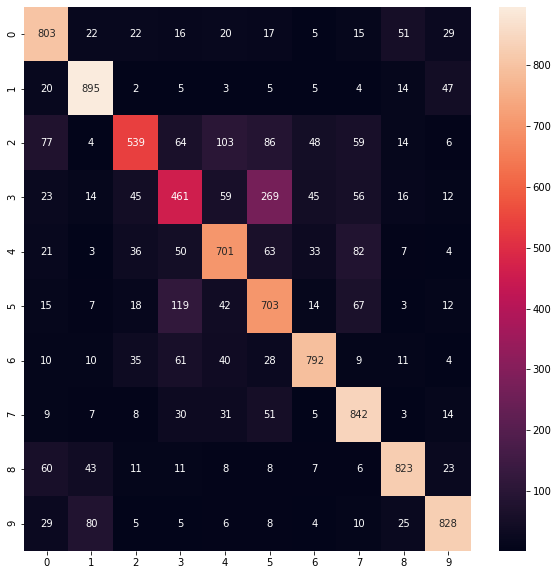

In [17]:
# Evaluate  the results on a 'Confusion Matrix'
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_predict)
cm
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot = True, fmt ='d')

## Saving the model

import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
  os.makedirs(directory)
model_path = os.path.join(directory,'keras_cifar10_trained_model.h5')
cnn_model.save()

In [0]:
cnn_model.save('cnn_cifar10_model.h5')

## Data Augmentation

In [0]:
import keras
from keras.datasets import cifar10
(X_train,y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [21]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
n =12
x_train_sample = X_train[:n]

In [0]:
x_train_sample.shape

(12, 32, 32, 3)

In [0]:
# Image data generator
from keras.preprocessing.image import ImageDataGenerator
#datagen_train = ImageDataGenerator(rotation_range=90)

#datagen_train = ImageDataGenerator(vertical_flip=True)
#datagen_train = ImageDataGenerator(height_shift_range=0.5)
datagen_train = ImageDataGenerator(brightness_range=(1,3))

datagen_train.fit(x_train_sample)

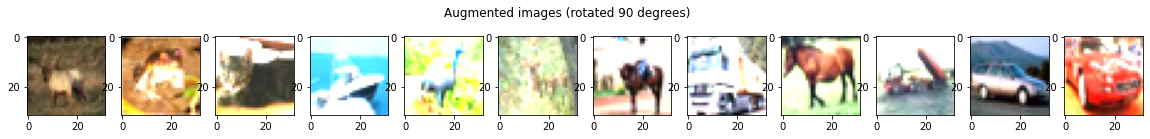

<Figure size 432x288 with 0 Axes>

In [25]:
from PIL import Image
from keras.preprocessing.image import array_to_img
fig = plt.figure(figsize = (20,2))
for x_batch in datagen_train.flow(x_train_sample, batch_size=n):
  for i in range(0,n):
    ax = fig.add_subplot(1,n,i+1)
    ax.imshow(array_to_img(x_batch[i]))
  fig.suptitle('Augmented images (rotated 90 degrees)')
  plt.show()
  break;
plt.savefig('augmented_images.png')

## Model Training using Augmented Data

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
                             rotation_range = 90,
                             width_shift_range = 0.1,
                             horizontal_flip = True,
                             )

In [0]:
datagen.fit(X_train)

In [47]:
cnn_model.fit_generator(datagen.flow(X_train,y_train,batch_size=100),epochs=20)

Epoch 1/20
500/500 [==============================] - 22s 43ms/step - loss: 1.2624 - acc: 0.5570
Epoch 2/20
500/500 [==============================] - 21s 43ms/step - loss: 1.2291 - acc: 0.5670
Epoch 3/20
500/500 [==============================] - 21s 43ms/step - loss: 1.2236 - acc: 0.5695
Epoch 4/20
500/500 [==============================] - 21s 43ms/step - loss: 1.2172 - acc: 0.5750
Epoch 5/20
500/500 [==============================] - 22s 43ms/step - loss: 1.2043 - acc: 0.5807
Epoch 6/20
500/500 [==============================] - 21s 43ms/step - loss: 1.2026 - acc: 0.5791
Epoch 7/20
500/500 [==============================] - 21s 43ms/step - loss: 1.2024 - acc: 0.5800
Epoch 8/20
500/500 [==============================] - 22s 43ms/step - loss: 1.1916 - acc: 0.5853
Epoch 9/20
500/500 [==============================] - 22s 43ms/step - loss: 1.1852 - acc: 0.5851
Epoch 10/20
500/500 [==============================] - 21s 43ms/step - loss: 1.1904 - acc: 0.5836
Epoch 11/20
500/500 [========

In [48]:

score = cnn_model.evaluate(X_test,y_test)
print('Test accuracy', score[1])

10000/10000 [==============================] - 1s 91us/step
Test accuracy 0.575


In [0]:
# Save the trained model
cnn_model.save('cnn_model_cifar10_augmented.h5')